# Task 7 Jupyter


## Titanic Data Analysis


In [1]:
import pandas as pd

# Загрузка данных
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Объединение данных
data = pd.concat([train, test], keys=['train', 'test'], ignore_index=True)

# Вывод первых строк
print(data.head())


   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# Приведение типов
data['Survived'] = data['Survived'].astype('category')  # Выживание
data['Pclass'] = data['Pclass'].astype('category')      # Класс
data['Sex'] = data['Sex'].astype('category')            # Пол

# Проверка типов данных
print(data.dtypes)


PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object


In [3]:
# Класс с наибольшим числом пассажиров
most_passengers_class = data['Pclass'].value_counts().idxmax()
print(f"Больше всего пассажиров в классе: {most_passengers_class}")


Больше всего пассажиров в классе: 3


In [4]:
# Средний возраст по классу и полу
grouped = data.groupby(['Pclass', 'Sex'], observed=False)['Age'].mean()
print(grouped)

# Самый юный
youngest = grouped.idxmin()
print(f"Самый юный: {youngest}, средний возраст: {grouped.min()}")

# Самый взрослый
oldest = grouped.idxmax()
print(f"Самый взрослый: {oldest}, средний возраст: {grouped.max()}")

age_gap = grouped.max() - grouped.min()
print(f'Разница в возрасте - {age_gap:.2f}')

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64
Самый юный: (3, 'female'), средний возраст: 22.185328947368422
Самый взрослый: (1, 'male'), средний возраст: 41.02927152317881
Разница в возрасте - 18.84


In [5]:
# Выжившие с фамилией на "K"
survivors_k = data[data['Name'].str.startswith('K') & (data['Survived'] == 1)]
sorted_k = survivors_k.sort_values(by='Fare', ascending=False)

# Самый дорогой билет
most_expensive = sorted_k.iloc[0]
# Самый дешевый билет
least_expensive = sorted_k.iloc[-1]

print(f"Кто заплатил больше всех: {most_expensive['Name']} ({most_expensive['Fare']})")
print(f"Кто заплатил меньше всех: {least_expensive['Name']} ({least_expensive['Fare']})")


Кто заплатил больше всех: Kimball, Mr. Edwin Nelson Jr (52.5542)
Кто заплатил меньше всех: Kelly, Miss. Mary (7.75)


In [6]:
# Максимальное количество родных
data['Relatives'] = data['SibSp'] + data['Parch']
max_relatives = data[data['Survived'] == 1]['Relatives'].max()
print(f"Максимальное количество родных у выжившего: {max_relatives}")


Максимальное количество родных у выжившего: 6


In [7]:
# Средняя стоимость билетов
mean_with_cabin = data[data['Cabin'].notna()]['Fare'].mean()
mean_without_cabin = data[data['Cabin'].isna()]['Fare'].mean()

print(f"Средняя стоимость с каютой: {mean_with_cabin}")
print(f"Средняя стоимость без каюты: {mean_without_cabin}")
print(f"Отличие в {mean_with_cabin / mean_without_cabin:.2f} раз")


Средняя стоимость с каютой: 81.92899830508475
Средняя стоимость без каюты: 19.132707206317864
Отличие в 4.28 раз


## Visualisation


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

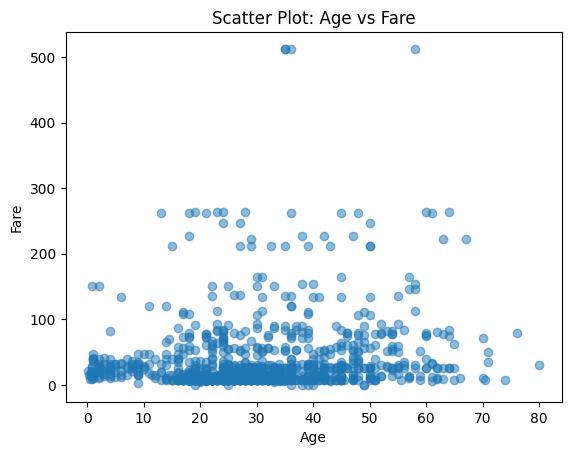

In [9]:
import matplotlib.pyplot as plt

plt.scatter(data['Age'], data['Fare'], alpha=0.5)
plt.title('Scatter Plot: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


In [10]:
import plotly.express as px

fig = px.scatter_3d(data, x='Age', y='Fare', z='Relatives', color='Pclass')
fig.show()


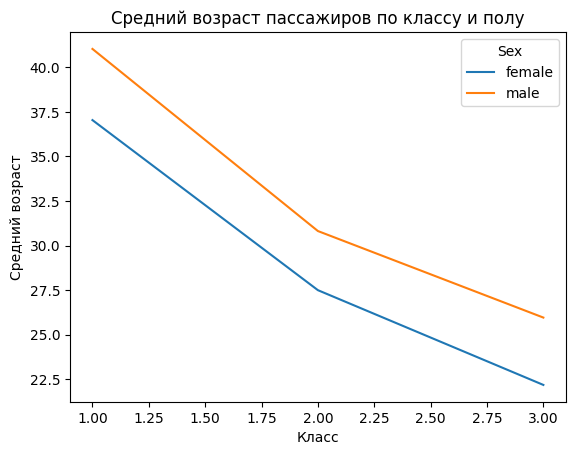

In [11]:
# Linear plot: Возраст пассажиров в зависимости от класса
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=data, x="Pclass", y="Age", hue="Sex", errorbar=None)
plt.title("Средний возраст пассажиров по классу и полу")
plt.xlabel("Класс")
plt.ylabel("Средний возраст")
plt.show()


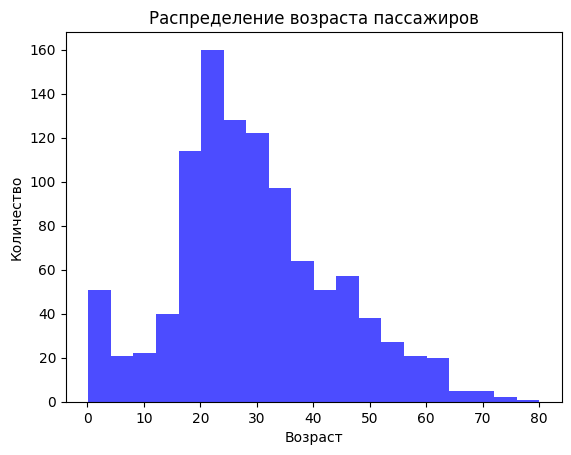

In [15]:
# Histogram: Распределение возраста пассажиров
plt.hist(data['Age'].dropna(), bins=20, alpha=0.7, color='blue')
plt.title("Распределение возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

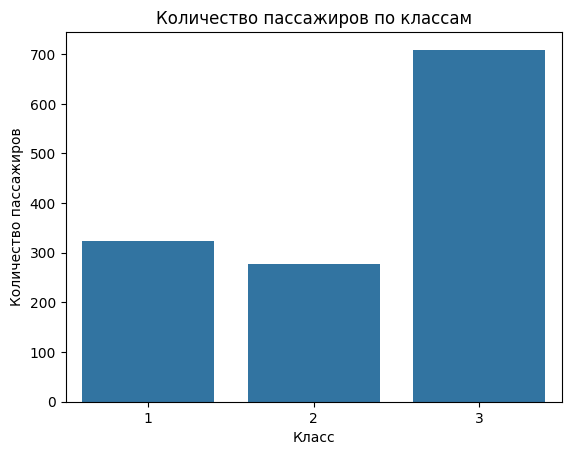

In [ ]:
# Bar chart: Количество пассажиров по классам
sns.barplot(x=data['Pclass'].value_counts().index, y=data['Pclass'].value_counts().values)
plt.title("Количество пассажиров по классам")
plt.xlabel("Класс")
plt.ylabel("Количество пассажиров")
plt.show()


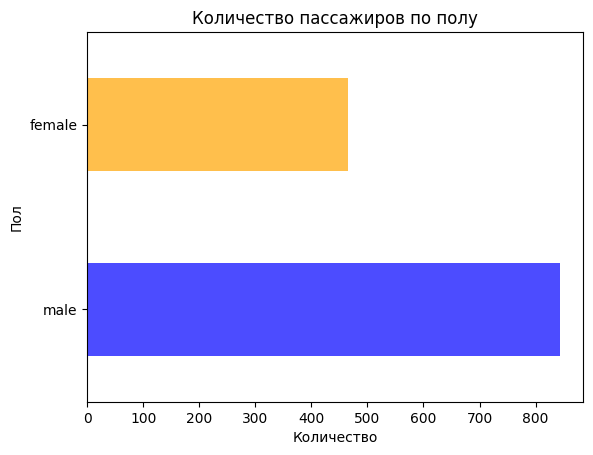

In [ ]:
# Horizontal Bar Chart: Количество пассажиров по полу
data['Sex'].value_counts().plot(kind='barh', color=['blue', 'orange'], alpha=0.7)
plt.title("Количество пассажиров по полу")
plt.xlabel("Количество")
plt.ylabel("Пол")
plt.show()


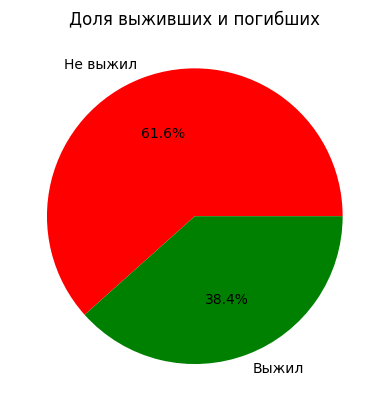

In [ ]:
# Pie Chart: Выживаемость
data['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=["Не выжил", "Выжил"], colors=['red', 'green'])
plt.title("Доля выживших и погибших")
plt.ylabel("")
plt.show()


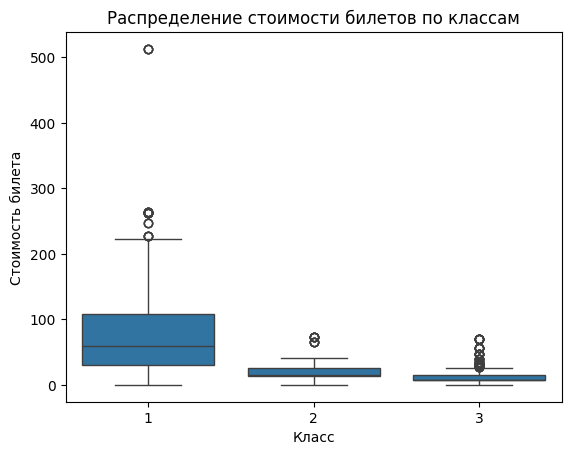

In [12]:
# Box Chart: Стоимость билетов по классам
sns.boxplot(x=data['Pclass'], y=data['Fare'])
plt.title("Распределение стоимости билетов по классам")
plt.xlabel("Класс")
plt.ylabel("Стоимость билета")
plt.show()


In [13]:
import plotly.express as px

# Проверяем и преобразуем категориальные данные
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')

# Подготовка данных для Sunburst Chart
data_grouped = data.groupby(['Pclass', 'Sex'], dropna=False, observed=False).agg({'Fare': 'sum'}).reset_index()

# Sunburst Chart
fig = px.sunburst(
    data_grouped,
    path=['Pclass', 'Sex'],  # Пути для построения графика
    values='Fare',           # Значение для отображения
    title='Распределение пассажиров по классу и полу'
)
fig.show()


/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Доп

In [14]:
import plotly.graph_objects as go

# Пример Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        label=['Мужчины', 'Женщины', 'Выжили', 'Не выжили'],
        pad=15,
        thickness=20
    ),
    link=dict(
        source=[0, 0, 1, 1],
        target=[2, 3, 2, 3],
        value=[data[(data['Sex'] == 'male') & (data['Survived'] == 1)].shape[0],
               data[(data['Sex'] == 'male') & (data['Survived'] == 0)].shape[0],
               data[(data['Sex'] == 'female') & (data['Survived'] == 1)].shape[0],
               data[(data['Sex'] == 'female') & (data['Survived'] == 0)].shape[0]]
    )
))

# Показываем график
fig.show()
